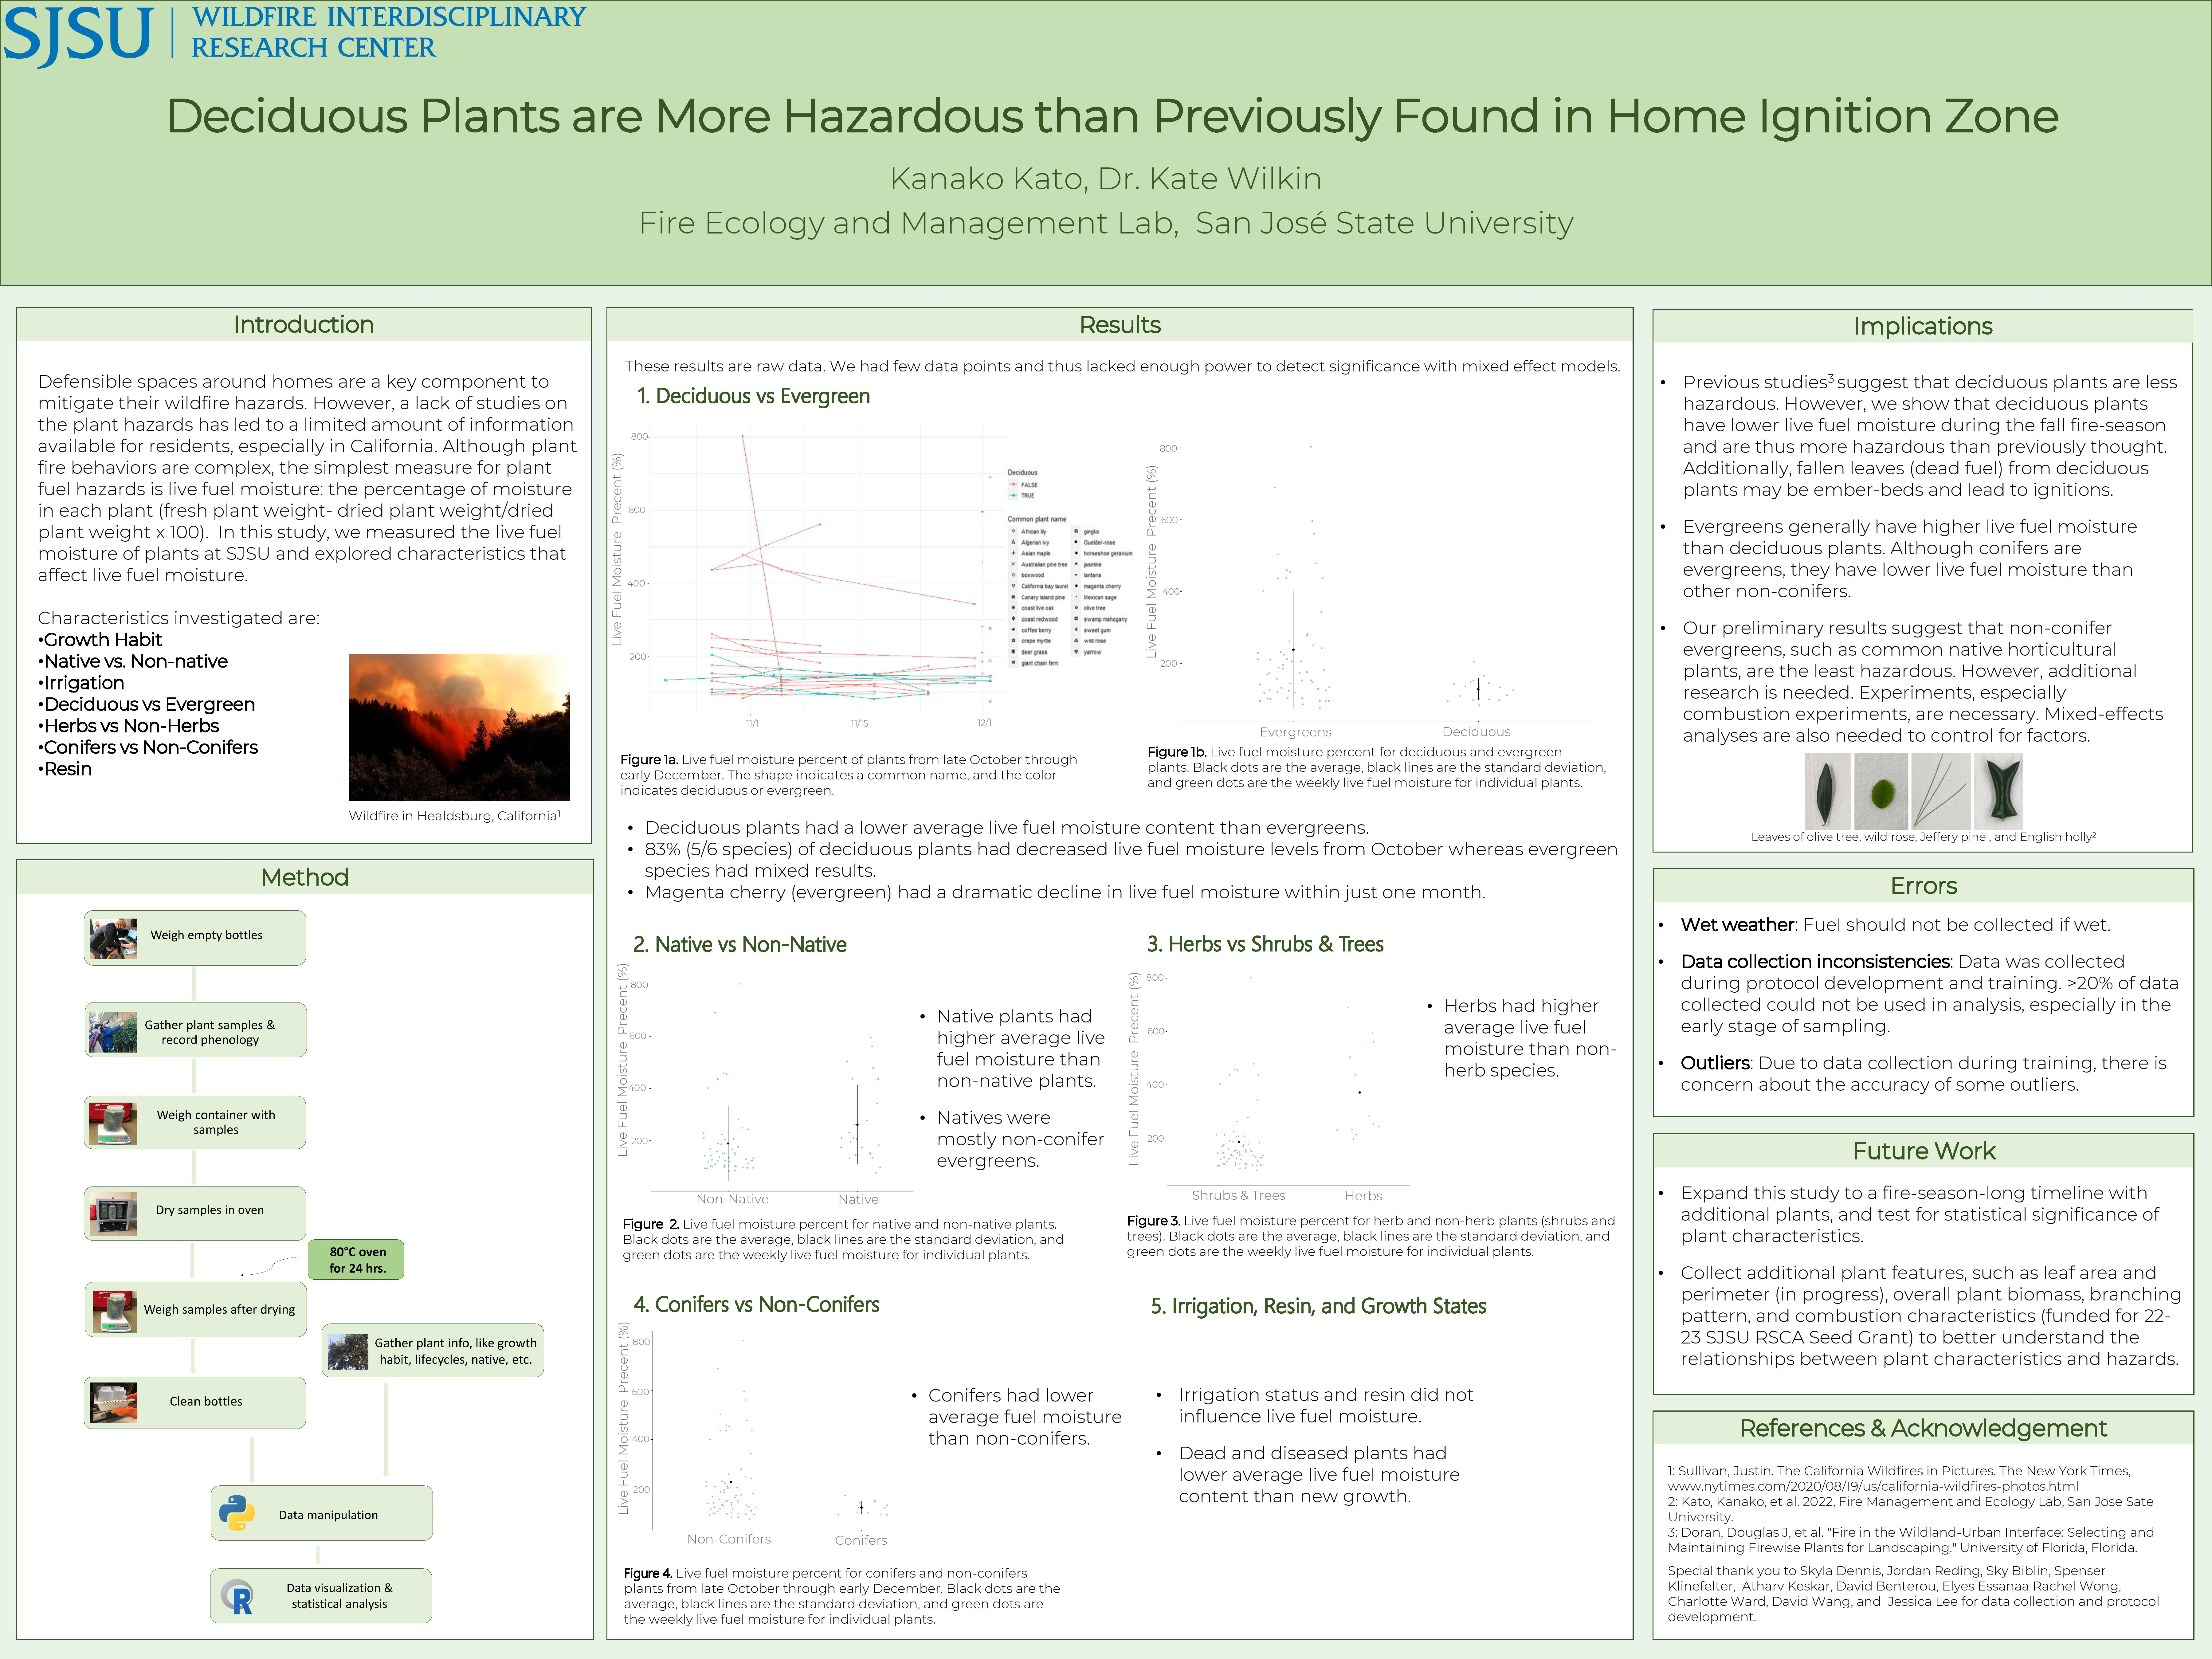

4 documents needed 


# 1.   Fuel Moisture Bottle Weight - record weight: fuel mositure percent 
# 2.   Horticultural live fuel moisture (Responses): bottle information 

# 1.   HIZ plant info, site info, etc, - plant: plant characteristics

# 1.   HIZ plant info, site info, etc, - site, data collector, semester: Irrigation info 




They all can be found on HIZ folder 






Importing data 


In [ ]:
from google.colab import files
files_uploaded = files.upload()

Saving Fuel Moisture Bottle Weight - record weight(3).csv to Fuel Moisture Bottle Weight - record weight(3).csv


In [ ]:
import pandas as pd 
df1= pd.read_csv(r'Fuel Moisture Bottle Weight - record weight(3).csv')
df1.dtypes #check datatypes

EMPTY Collector               object
EMPTY Date (MM/DD/YYYY)       object
EMPTY Bottle number          float64
EMPTY (gram)                 float64
EMPTY Comment                float64
WET Collector                 object
WET Date (MM/DD/YYYY)         object
WET Bottle number            float64
WET (gram)                   float64
Oven (C°)                    float64
WET Comment                   object
DRY Collector                 object
DRY Date (MM/DD/YYYY)         object
DRY Bottle number            float64
DRY (gram)                   float64
Oven (°C)                    float64
DRY Comment                   object
empty and wet match            int64
wet and dry match            float64
empty weigh less than wet    float64
wet weigh more than dry       object
in oven 1 day                float64
fuel moisture percent         object
Overall comment               object
dtype: object

quality control + changing datatypes

In [ ]:
#drop undesired columns 
df1=df1[df1['WET Collector'].notna()]
df1=df1[df1['empty and wet match']==0]
df1=df1[df1['wet and dry match']==0.0]
#changing datatype of "emmpty weigh less than wet" string to numeric 
df1["empty weigh less than wet"] = pd.to_numeric(df1["empty weigh less than wet"], errors='coerce')
df1=df1[df1['empty weigh less than wet']<0]
#to make the merging easy, changing WET date to string datatype 
df1['WET Date (MM/DD/YYYY)'] = pd.to_datetime(df1['WET Date (MM/DD/YYYY)'])
#fuel moisture object to numeric 
df1["fuel moisture percent"] = pd.to_numeric(df1["fuel moisture percent"], errors='coerce')


Importing data

In [ ]:
from google.colab import files
files_uploaded = files.upload()

Saving Horticultural live fuel moisture (Responses) - Form Responses 1.csv to Horticultural live fuel moisture (Responses) - Form Responses 1.csv


In [ ]:
df2=pd.read_csv(r'Horticultural live fuel moisture (Responses) - Form Responses 1.csv')

In [ ]:
df2.dtypes

Timestamp                                                                                                                  object
Email Address                                                                                                              object
Score                                                                                                                     float64
Field data collector                                                                                                       object
Location                                                                                                                   object
Common plant name                                                                                                          object
What is the NEW GROWTH fuel's bottle matching number on the bottle and cap?                                               float64
New growth (choose one, unless starting and continuing)                                   

quality control and changing datatypes

In [ ]:
#drop NA values, changing column name
df2=df2[df2['Common plant name']!='NEED TO MAKE DROP-DOWN or Multiple choice?']
df2=df2[df2['Common plant name']!='Option 1']
df2.rename(columns={"What is the NEW GROWTH fuel's bottle matching number on the bottle and cap?": 'New Growth', "What is the OLD GROWTH fuel's bottle matching number on the bottle and cap?": 'Old Growth', "What is the DISEASED & DEAD leaf, etc.  fuel's (still attached to plant) bottle matching number on the bottle and cap?":"Diseased Dead","What is the FLOWER / FRUIT fuel's (still attached to plant) bottle matching number on the bottle and cap?":"Flower Fruit"}, inplace=True)
#changing datatypes object to numeric  
df2["New Growth"] = pd.to_numeric(df2["New Growth"], errors='coerce')
df2["Diseased Dead"] = pd.to_numeric(df2["Diseased Dead"], errors='coerce')
df2["Flower Fruit"] = pd.to_numeric(df2["Flower Fruit"], errors='coerce')
#fixing time stamp format to match the WET date format and match datatype with WET date 
df2["Timestamp"] = pd.to_datetime(df2["Timestamp"]).dt.strftime('%m/%d/%Y')
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'])

# Merging two table 


primary key for join is date collected and bottle number 

In [ ]:
new_table=pd.merge(df1, df2, how='inner', left_on=['WET Date (MM/DD/YYYY)', 'WET Bottle number'], right_on=['Timestamp', 'New Growth'])
new_table=new_table[new_table['New Growth'].notna()]
new_table 

,EMPTY Collector,EMPTY Date (MM/DD/YYYY),EMPTY Bottle number,EMPTY (gram),EMPTY Comment,WET Collector,WET Date (MM/DD/YYYY),WET Bottle number,WET (gram),Oven (C°),...,Fruit,Phenology Comments,General Comments,Weather Comments,Old Growth,Location.1,Diseased Dead,Flower Fruit,Temperature (°F),Relative humidity
0,Jordan Reding,10/14/2021,32.0,101.5,NaN,Kanako Kato,2021-10-21,32.0,112.1,NaN,...,"RIPE: Seeds, berries, or nuts appear to be mos...",NaN,NaN,NaN,31.0,Aquatics entrance,NaN,NaN,NaN,NaN
1,Atharv Keskar,10/26/2021,2.0,102.7,NaN,Jordan Reding,2021-10-27,2.0,181.1,55.0,...,"FALLEN: Most seeds, berries, or nuts are gone.",Seems to be on the latter of seasonal fruit,Some new and old growth with matured seeds,Sunny,2.0,San Salvador between 6th and 7th along South P...,NaN,2.0,NaN,NaN
2,Atharv Keskar,10/26/2021,4.0,101.1,NaN,Jordan Reding,2021-10-27,4.0,169.5,55.0,...,"RIPE: Seeds, berries, or nuts appear to be mos...",Many needs seeds and few old,There is a lot of new growth and some old grow...,Sunny,4.0,National Bank Gate,NaN,4.0,NaN,NaN
3,Atharv Keskar,10/26/2021,5.0,101.8,NaN,Jordan Reding,2021-10-27,5.0,246.8,55.0,...,"PRESENTING: Seeds, berries, or nuts are in vie...",Nearly developed seeds,More new than old,Sunny,5.0,National Bank Gate,NaN,5.0,NaN,NaN
4,Atharv Keskar,10/26/2021,7.0,102.5,NaN,Jordan Reding,2021-10-27,7.0,182.1,55.0,...,NONE: Fruit is gone or is rare and isolated to...,No fruit,Normal new and old growth,Sunny,7.0,Health Building,NaN,NaN,NaN,NaN
5,Atharv Keskar,10/26/2021,10.0,101.4,NaN,Skyla Dennis,2021-10-27,10.0,129.3,37.0,...,NONE: Fruit is gone or is rare and isolated to...,NaN,NaN,shady 72 degrees,10.0,Art Building,NaN,NaN,NaN,NaN
6,Atharv Keskar,10/26/2021,26.0,102.2,NaN,Skyla Dennis,2021-10-27,26.0,129.6,37.0,...,NONE: Fruit is gone or is rare and isolated to...,NaN,NaN,72 degrees,26.0,Campus Village 2,NaN,NaN,NaN,NaN
7,Atharv Keskar,10/26/2021,28.0,102.1,NaN,Skyla Dennis,2021-10-27,28.0,170.2,37.0,...,NONE: Fruit is gone or is rare and isolated to...,NaN,NaN,72 degrees,28.0,Campus Village 2,NaN,NaN,NaN,NaN
8,Atharv Keskar,10/26/2021,27.0,101.1,NaN,Skyla Dennis,2021-10-27,27.0,133.0,37.0,...,"RIPE: Seeds, berries, or nuts appear to be mos...",ask about seeds,NaN,72 degrees,27.0,Art Building,NaN,NaN,NaN,NaN
9,Atharv Keskar,10/26/2021,42.0,102.2,NaN,Skyla Dennis,2021-10-27,42.0,147.3,37.0,...,NONE: Fruit is gone or is rare and isolated to...,maybe flowers are starting ask!,NaN,72 degrees,42.0,Campus Village 2,NaN,NaN,NaN,NaN


In [ ]:
old_table=df1.merge(df2, how='inner', left_on=['WET Date (MM/DD/YYYY)','WET Bottle number'], right_on=['Timestamp','Old Growth'])
old_table=old_table[old_table['Old Growth'].notna()]
old_table

,EMPTY Collector,EMPTY Date (MM/DD/YYYY),EMPTY Bottle number,EMPTY (gram),EMPTY Comment,WET Collector,WET Date (MM/DD/YYYY),WET Bottle number,WET (gram),Oven (C°),...,Fruit,Phenology Comments,General Comments,Weather Comments,Old Growth,Location.1,Diseased Dead,Flower Fruit,Temperature (°F),Relative humidity
0,Jordan Reding,10/14/2021,31.0,102.0,NaN,Kanako Kato,2021-10-21,31.0,116.4,NaN,...,"RIPE: Seeds, berries, or nuts appear to be mos...",NaN,NaN,NaN,31.0,Aquatics entrance,NaN,NaN,NaN,NaN
1,Jordan Reding,10/14/2021,33.0,101.4,NaN,Kanako Kato,2021-10-21,33.0,117.1,NaN,...,NONE: Fruit is gone or is rare and isolated to...,NaN,NaN,NaN,33.0,Aquatics entrance,34.0,NaN,NaN,NaN
2,Jordan Reding,10/14/2021,47.0,101.2,NaN,Kanako Kato,2021-10-21,47.0,132.0,NaN,...,"RIPE: Seeds, berries, or nuts appear to be mos...",NaN,NaN,NaN,47.0,Aquatics entrance,NaN,NaN,NaN,NaN
3,Atharv Keskar,10/26/2021,1.0,102.4,NaN,Jordan Reding,2021-10-27,1.0,133.8,55.0,...,"FALLEN: Most seeds, berries, or nuts are gone.",Dispersing seeds still at good volumes,Old growth with some seeds and starting to die...,Sunny day,1.0,Sweeney Hall entrance,NaN,1.0,NaN,NaN
4,Atharv Keskar,10/26/2021,2.0,102.7,NaN,Jordan Reding,2021-10-27,2.0,181.1,55.0,...,"FALLEN: Most seeds, berries, or nuts are gone.",Seems to be on the latter of seasonal fruit,Some new and old growth with matured seeds,Sunny,2.0,San Salvador between 6th and 7th along South P...,NaN,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Skyla Dennis,12/1/21,38.0,101.8,NaN,Skyla Dennis,2021-12-01,38.0,155.4,NaN,...,NONE: Fruit is gone or is rare and isolated to...,NaN,NaN,sunny,38.0,Aquatics entrance,NaN,NaN,NaN,NaN
82,Skyla Dennis,12/1/21,40.0,100.7,NaN,Skyla Dennis,2021-12-01,40.0,129.7,NaN,...,"FALLEN: Most seeds, berries, or nuts are gone.",NaN,NaN,shady,40.0,Art Building,NaN,NaN,NaN,NaN
83,Skyla Dennis,12/1/21,41.0,102.1,NaN,Skyla Dennis,2021-12-01,41.0,169.1,NaN,...,NONE: Fruit is gone or is rare and isolated to...,NaN,NaN,sunny,41.0,Campus Village 2,NaN,NaN,NaN,NaN
84,Skyla Dennis,12/1/21,42.0,101.6,NaN,Skyla Dennis,2021-12-01,42.0,134.0,NaN,...,NONE: Fruit is gone or is rare and isolated to...,NaN,NaN,shady,42.0,Art Building,NaN,NaN,NaN,NaN


In [ ]:
dead_disease_table=df1.merge(df2, how='inner', left_on=['WET Date (MM/DD/YYYY)', 'WET Bottle number'], right_on=['Timestamp', "Diseased Dead"])
dead_disease_table

,EMPTY Collector,EMPTY Date (MM/DD/YYYY),EMPTY Bottle number,EMPTY (gram),EMPTY Comment,WET Collector,WET Date (MM/DD/YYYY),WET Bottle number,WET (gram),Oven (C°),...,Fruit,Phenology Comments,General Comments,Weather Comments,Old Growth,Location.1,Diseased Dead,Flower Fruit,Temperature (°F),Relative humidity
0,Jordan Reding,10/14/2021,34.0,101.3,NaN,Kanako Kato,2021-10-21,34.0,119.7,NaN,...,NONE: Fruit is gone or is rare and isolated to...,NaN,NaN,NaN,33.0,Aquatics entrance,34.0,NaN,NaN,NaN
1,Atharv Keskar,10/26/2021,3.0,101.7,NaN,Jordan Reding,2021-10-27,3.0,157.9,55.0,...,NONE: Fruit is gone or is rare and isolated to...,Seems to bare no fruit at this time,Leaves are dying from seasonal change,Sunny,3.0,National Bank Gate,3.0,NaN,NaN,NaN
2,Skyla Dennis,11/3/2021,45.0,101.1,NaN,Skyla Dennis,2021-11-03,45.0,117.3,53.0,...,NONE: Fruit is gone or is rare and isolated to...,NaN,some of the leafs are turning yellow on the bo...,66 degrees,27.0,Aquatics entrance,45.0,NaN,NaN,NaN
3,Jordan Reding,11/5/21,32.0,101.6,NaN,Jordan Reding,2021-11-05,32.0,154.2,55.0,...,"FALLEN: Most seeds, berries, or nuts are gone.",NaN,NaN,Sunny,32.0,National Bank Gate,32.0,NaN,NaN,NaN
4,Skyla Dennis,11/10/21,7.0,101.1,NaN,Skyla Dennis,2021-11-10,7.0,117.6,NaN,...,NONE: Fruit is gone or is rare and isolated to...,NaN,NaN,NaN,33.0,Aquatics entrance,7.0,NaN,NaN,NaN
5,Atharv Keskar,11/16/21,27.0,101.0,NaN,Jordan Reding,2021-11-17,27.0,152.0,69.0,...,"FALLEN: Most seeds, berries, or nuts are gone.",NaN,NaN,Sunny,27.0,National Bank Gate,27.0,27.0,NaN,NaN
6,Skyla Dennis,11/17/21,12.0,101.6,NaN,Skyla Dennis,2021-11-17,12.0,148.8,69.0,...,NONE: Fruit is gone or is rare and isolated to...,NaN,NaN,66 degrees,7.0,Aquatics entrance,12.0,NaN,NaN,NaN
7,Atharv Keskar,11/23/21,25.0,101.5,NaN,Jordan Reding,2021-11-24,25.0,149.5,75.0,...,"FALLEN: Most seeds, berries, or nuts are gone.",NaN,NaN,Sunny,25.0,Health Building,25.0,NaN,NaN,NaN
8,Atharv Keskar,11/23/21,30.0,101.5,NaN,Jordan Reding,2021-11-24,30.0,211.9,75.0,...,NONE: Fruit is gone or is rare and isolated to...,NaN,NaN,Sunny,30.0,Recreation Center near islands,30.0,NaN,NaN,NaN


In [ ]:
flower_table=df1.merge(df2, how='inner', left_on=['WET Date (MM/DD/YYYY)', 'WET Bottle number'], right_on=["Timestamp", "Flower Fruit"])
flower_table

,EMPTY Collector,EMPTY Date (MM/DD/YYYY),EMPTY Bottle number,EMPTY (gram),EMPTY Comment,WET Collector,WET Date (MM/DD/YYYY),WET Bottle number,WET (gram),Oven (C°),...,Fruit,Phenology Comments,General Comments,Weather Comments,Old Growth,Location.1,Diseased Dead,Flower Fruit,Temperature (°F),Relative humidity
0,Atharv Keskar,10/26/2021,1.0,102.4,NaN,Jordan Reding,2021-10-27,1.0,133.8,55.0,...,"FALLEN: Most seeds, berries, or nuts are gone.",Dispersing seeds still at good volumes,Old growth with some seeds and starting to die...,Sunny day,1.0,Sweeney Hall entrance,NaN,1.0,NaN,NaN
1,Atharv Keskar,10/26/2021,2.0,102.7,NaN,Jordan Reding,2021-10-27,2.0,181.1,55.0,...,"FALLEN: Most seeds, berries, or nuts are gone.",Seems to be on the latter of seasonal fruit,Some new and old growth with matured seeds,Sunny,2.0,San Salvador between 6th and 7th along South P...,NaN,2.0,NaN,NaN
2,Atharv Keskar,10/26/2021,4.0,101.1,NaN,Jordan Reding,2021-10-27,4.0,169.5,55.0,...,"RIPE: Seeds, berries, or nuts appear to be mos...",Many needs seeds and few old,There is a lot of new growth and some old grow...,Sunny,4.0,National Bank Gate,NaN,4.0,NaN,NaN
3,Atharv Keskar,10/26/2021,5.0,101.8,NaN,Jordan Reding,2021-10-27,5.0,246.8,55.0,...,"PRESENTING: Seeds, berries, or nuts are in vie...",Nearly developed seeds,More new than old,Sunny,5.0,National Bank Gate,NaN,5.0,NaN,NaN
4,Kanako Kato,11/4/21,4.0,101.1,NaN,Kanako Kato,2021-11-04,4.0,158.2,85.0,...,"RIPE: Seeds, berries, or nuts appear to be mos...",NaN,NaN,NaN,6.0,Aquatics entrance,NaN,4.0,NaN,NaN
5,Jordan Reding,11/5/21,30.0,101.8,NaN,Jordan Reding,2021-11-05,30.0,138.7,55.0,...,"RIPE: Seeds, berries, or nuts appear to be mos...",NaN,NaN,Sunny,30.0,Sweeney Hall entrance,NaN,30.0,NaN,NaN
6,Jordan Reding,11/5/21,31.0,102.2,NaN,Jordan Reding,2021-11-05,31.0,193.6,55.0,...,"RIPE: Seeds, berries, or nuts appear to be mos...",NaN,NaN,Sunny,31.0,San Salvador between 6th and 7th along South P...,NaN,31.0,NaN,NaN
7,Jordan Reding,11/5/21,33.0,101.3,NaN,Jordan Reding,2021-11-05,33.0,173.5,55.0,...,"RIPE: Seeds, berries, or nuts appear to be mos...",NaN,NaN,Sunny,33.0,National Bank Gate,NaN,33.0,NaN,NaN
8,Jordan Reding,11/5/21,34.0,101.4,NaN,Jordan Reding,2021-11-05,34.0,244.9,55.0,...,"RIPE: Seeds, berries, or nuts appear to be mos...",NaN,NaN,Sunny,34.0,National Bank Gate,NaN,34.0,NaN,NaN
9,Atharv Keskar,11/16/21,26.0,102.0,NaN,Jordan Reding,2021-11-17,26.0,190.7,69.0,...,"FALLEN: Most seeds, berries, or nuts are gone.",NaN,NaN,Sunny,26.0,San Salvador between 6th and 7th along South P...,NaN,26.0,NaN,NaN


creating table where theres is a additional column with state(old, new or dead/diseased) for future analysis. eg. mean difference in between growth state 

In [ ]:
#adding a state column and entering data 
old_table['state']='old'
new_table['state']='new'
dead_disease_table['state']='dead or diseased'

In [ ]:
#taking only fuel moisuture and state column to have a cleaner df 
O_T=old_table[['fuel moisture percent', 'state']]
N_T=new_table[['fuel moisture percent', 'state']]
D_T=dead_disease_table[['fuel moisture percent', 'state']]

In [ ]:
frames=[O_T, N_T, D_T]
OND=pd.concat(frames)

In [ ]:
OND.to_csv('OND1.csv')#saving as csv

adding info of plants into merged table 

In [ ]:
from google.colab import files
files_uploaded = files.upload()

Saving HIZ plant info, site info, etc, - plant(5).csv to HIZ plant info, site info, etc, - plant(5).csv


In [ ]:
df3= pd.read_csv(r'HIZ plant info, site info, etc, - plant(5).csv')
df3.columns = df3.iloc[0] 
df3 = df3[1:]

In [ ]:
df3

old table with plant info

In [ ]:
oldwithinfo=old_table.merge(df3, how='inner', left_on=['Common plant name'], right_on=["Common name (lower case unless proper noun)"])
oldwithinfo.to_csv('oldwithinfoUPDATED2.csv')#save it as csv

,EMPTY Collector,EMPTY Date (MM/DD/YYYY),EMPTY Bottle number,EMPTY (gram),EMPTY Comment,WET Collector,WET Date (MM/DD/YYYY),WET Bottle number,WET (gram),Oven (C°),...,Comment.spreading,Open,Closed,Comment.branching,NaN,NaN,NaN,NaN,NaN,NaN
0,Jordan Reding,10/14/2021,31.0,102.0,NaN,Kanako Kato,2021-10-21,31.0,116.4,NaN,...,NaN,FALSE,FALSE,NaN,NaN,"King Filmer, Ann. Safe and Poisonous Garden Pl...","California Integrated Pest Council (CAL IPC), ...",NaN,NaN,NaN
1,Kanako Kato,11/4/21,3.0,101.7,NaN,Kanako Kato,2021-11-04,3.0,117.6,85.0,...,NaN,FALSE,FALSE,NaN,NaN,"King Filmer, Ann. Safe and Poisonous Garden Pl...","California Integrated Pest Council (CAL IPC), ...",NaN,NaN,NaN
2,Atharv Keskar,11/23/21,48.0,102.2,NaN,Kanako Kato,2021-12-02,48.0,114.1,80.0,...,NaN,FALSE,FALSE,NaN,NaN,"King Filmer, Ann. Safe and Poisonous Garden Pl...","California Integrated Pest Council (CAL IPC), ...",NaN,NaN,NaN
3,Jordan Reding,10/14/2021,33.0,101.4,NaN,Kanako Kato,2021-10-21,33.0,117.1,NaN,...,NaN,FALSE,FALSE,NaN,NaN,"King Filmer, Ann. Safe and Poisonous Garden Pl...","California Integrated Pest Council (CAL IPC), ...",NaN,NaN,NaN
4,Atharv Keskar,11/23/21,39.0,100.9,NaN,Kanako Kato,2021-12-02,39.0,131.4,80.0,...,NaN,FALSE,FALSE,NaN,NaN,"King Filmer, Ann. Safe and Poisonous Garden Pl...","California Integrated Pest Council (CAL IPC), ...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Sky Biblin,11/5/21,24.0,103.0,NaN,Sky Biblin,2021-11-05,24.0,138.2,NaN,...,NaN,FALSE,FALSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,Sky Biblin,11/30/21,24.0,102.8,NaN,Sky Biblin,2021-11-30,24.0,138.5,NaN,...,NaN,FALSE,FALSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,Atharv Keskar,11/23/21,43.0,101.6,NaN,Kanako Kato,2021-12-02,43.0,128.7,80.0,...,NaN,FALSE,FALSE,NaN,NaN,"King Filmer, Ann. Safe and Poisonous Garden Pl...","California Integrated Pest Council (CAL IPC), ...",NaN,NaN,NaN
84,Atharv Keskar,11/23/21,44.0,101.8,NaN,Kanako Kato,2021-12-02,44.0,150.0,80.0,...,NaN,FALSE,FALSE,NaN,NaN,"King Filmer, Ann. Safe and Poisonous Garden Pl...","California Integrated Pest Council (CAL IPC), ...",NaN,NaN,NaN


In [ ]:
newinfo_table=avg_new.merge(df3, how='inner', left_on=['Common plant name'], right_on=["Common name (lower case unless proper noun)"])
newinfo_table

,Common plant name,fuel moisture percent,Family (ends in -aceae),Latin name,Common name (lower case unless proper noun),Native,Non-native,Unknown,Grass,Herb,...,Comment.spreading,Open,Closed,Comment.branching,NaN,NaN,NaN,NaN,NaN,NaN
0,Australian pine tree,95.306667,Casuarinaceae,Casuarina equisetifolia,Australian pine tree,FALSE,TRUE,FALSE,FALSE,FALSE,...,NaN,FALSE,FALSE,NaN,NaN,"King Filmer, Ann. Safe and Poisonous Garden Pl...",", . Australian Pine Tree (Casuarina equisetifo...",NaN,NaN,NaN
1,Canary Island pine,121.545000,Pinaceae,Pinus canariensis,Canary Island pine,FALSE,TRUE,FALSE,FALSE,FALSE,...,NaN,FALSE,FALSE,NaN,NaN,NaN,"King Filmer, Ann. Safe and Poisonous Garden Pl...","California Integrated Pest Council (CAL IPC), ...",NaN,NaN
2,Mexican sage,436.540000,Lamiaceae,Salvia sp.,Mexican sage,FALSE,FALSE,TRUE,FALSE,FALSE,...,NaN,FALSE,FALSE,NaN,NaN,"King Filmer, Ann. Safe and Poisonous Garden Pl...",NaN,NaN,"Conde-Hernández, L. A. et al. Mexican Sage (Sa...",NaN
3,boxwood,228.336667,Buxaceae,Buxus sp.,boxwood,FALSE,TRUE,FALSE,FALSE,FALSE,...,NaN,FALSE,FALSE,NaN,NaN,"Record, Samuel J. Boxwoods. Boxwoods, Yale Sch...","King Filmer, Ann. Safe and Poisonous Garden Pl...",NaN,NaN,NaN
4,coast redwood,154.662500,Cupressaceae,Sequoia sempervirens,coast redwood,TRUE,FALSE,FALSE,FALSE,FALSE,...,NaN,FALSE,FALSE,NaN,NaN,"King Filmer, Ann. Safe and Poisonous Garden Pl...",NaN,NaN,NaN,NaN
5,coffee berry,274.360000,Rhamnaceae,Rhamnus sp.,coffee berry,TRUE,FALSE,FALSE,FALSE,FALSE,...,NaN,FALSE,FALSE,NaN,NaN,"Saupe, Stephen G. Plant Taxonomy. Plant Taxono...","King Filmer, Ann. Safe and Poisonous Garden Pl...","Ortiz, Americo. et al. Volatile Composition of...",NaN,NaN
6,jasmine,223.930000,Oleaceae- Olive Family,Jasmine sp.,jasmine,FALSE,TRUE,FALSE,FALSE,FALSE,...,NaN,FALSE,FALSE,NaN,NaN,", . Jasmine. , American Society for the Preven...",", . Chemical Composition, Olfactory Evaluation...",NaN,NaN,NaN
7,lantana,250.550000,Verbenaceae,Vervain,lantana,FALSE,TRUE,FALSE,FALSE,TRUE,...,NaN,FALSE,FALSE,NaN,NaN,"Saupe, Stephen G. Plant Taxonomy. Plant Taxono...","King Filmer, Ann. Safe and Poisonous Garden Pl...",NaN,NaN,NaN
8,olive tree,109.460000,Oleaceae,Olea europaea,olive tree,FALSE,TRUE,FALSE,FALSE,FALSE,...,NaN,FALSE,FALSE,NaN,NaN,"Zhou, Lijun. et al. Volatile compound analysi...",NaN,NaN,NaN,NaN
9,wild rose,216.130000,Rosaceae,Rosa californica,wild rose,TRUE,FALSE,FALSE,FALSE,FALSE,...,NaN,FALSE,FALSE,NaN,NaN,"King Filmer, Ann. Safe and Poisonous Garden Pl...","California Integrated Pest Council (CAL IPC), ...",NaN,NaN,NaN


In [ ]:
ddinfo_table=avg_disease.merge(df3, how='inner', left_on=['Common plant name'], right_on=["Common name (lower case unless proper noun)"])
ddinfo_table

,Common plant name,fuel moisture percent,Family (ends in -aceae),Latin name,Common name (lower case unless proper noun),Native,Non-native,Unknown,Grass,Herb,...,Comment.spreading,Open,Closed,Comment.branching,NaN,NaN,NaN,NaN,NaN,NaN
0,deer grass,76.920000,Poaceae,Muhlenbergia rigens,deer grass,TRUE,FALSE,FALSE,TRUE,FALSE,...,NaN,FALSE,FALSE,NaN,NaN,"King Filmer, Ann. Safe and Poisonous Garden Pl...","California Integrated Pest Council (CAL IPC), ...",NaN,NaN,NaN
1,gingko,103.310000,Ginkgoaceae,Gingko biloba,gingko,FALSE,TRUE,FALSE,FALSE,FALSE,...,NaN,FALSE,FALSE,NaN,NaN,"Li , Dewen. el al. Impact of elevated CO2 and ...",NaN,NaN,NaN,NaN
2,olive tree,101.680000,Oleaceae,Olea europaea,olive tree,FALSE,TRUE,FALSE,FALSE,FALSE,...,NaN,FALSE,FALSE,NaN,NaN,"Zhou, Lijun. et al. Volatile compound analysi...",NaN,NaN,NaN,NaN
3,sweet gum,101.463333,Altingiaceae,Liquidambar styraciflua,sweet gum,FALSE,TRUE,FALSE,FALSE,FALSE,...,NaN,FALSE,FALSE,NaN,NaN,"Kormanik, Paul P. Sweetgum. Southern Research ...","King Filmer, Ann. Safe and Poisonous Garden Pl...","California Integrated Pest Council (CAL IPC), ...","Fang, Chengwei. et al. Isoprene emission, phot...",NaN
4,yarrow,41.070000,Asteraceae,Achillea millefolia,yarrow,TRUE,FALSE,FALSE,FALSE,TRUE,...,NaN,FALSE,FALSE,NaN,NaN,"Saupe, Stephen G. Plant Taxonomy. Plant Taxono...","King Filmer, Ann. Safe and Poisonous Garden Pl...",NaN,NaN,NaN


you can concat all oldwithinfo, newinfo, ddinfo if you want for table which consist of all fuel mositure info with plant info 

Adding irrigation info into old fuel moisture table 

In [ ]:
from google.colab import files
files_uploaded = files.upload()

Saving HIZ plant info, site info, etc, - site, data collector, semester.csv to HIZ plant info, site info, etc, - site, data collector, semester.csv


In [ ]:
DF2= pd.read_csv(r'HIZ plant info, site info, etc, - site, data collector, semester.csv')

In [ ]:
#DF2.columns = DF2.columns.str.replace(' ','_')#deleting space
DF2=DF2.drop(['Semester','Collection time','Slope percent','Aspect (0-360 degrees)','Elevation (m)', 'General site description','Shade at 12 noon on summer solstice','Shade at 12 noon on fall equinox','Latitude','Longitude','Associated weather station','Comments'], axis=1)
DF2=DF2.drop_duplicates()

merge irrigation info to old with info 

In [ ]:
DF3=oldwithinfo.merge(DF2, how='left', left_on=['Common plant name', 'WET Collector'], right_on=["Common name", 'Data collector'])

In [ ]:
DF3.to_csv('oldwithirrigation.csv')#save it as csv

NOTE: 
new  growth, flower, dead and disease did not have many data points

# **extra**
quick data analysis: finding avg fuel mositure bycommon name on different growth state

In [ ]:
avg_new=new_table.groupby('Common plant name', as_index=False)['fuel moisture percent'].mean()
avg_new

,Common plant name,fuel moisture percent
0,Australian pine tree,95.306667
1,Canary Island pine,121.545000
2,Mexican sage,436.540000
3,boxwood,228.336667
4,coast redwood,154.662500
5,coffee berry,274.360000
6,jasmine,223.930000
7,lantana,250.550000
8,olive tree,109.460000
9,wild rose,216.130000


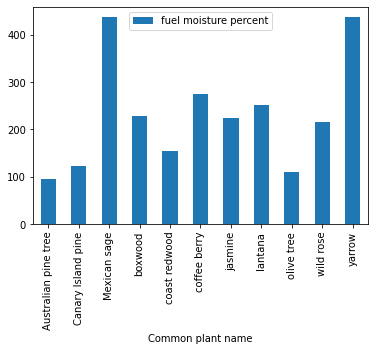

In [ ]:
ax= avg_new.plot.bar("Common plant name", y="fuel moisture percent", rot=90)

avg fuel moisture old growth


In [ ]:
avg_old=old_table.groupby('Common plant name', as_index=False)['fuel moisture percent'].mean()
avg_old

,Common plant name,fuel moisture percent
0,African lily,690.160000
1,Algerian ivy,188.300000
2,Asian maple,97.210000
3,Australian pine tree,97.222500
4,California bay laurel,134.250000
5,Canary Island pine,121.545000
6,Guelder-rose,144.586667
7,Mexican sage,437.760000
8,boxwood,163.835000
9,coast live oak,76.870000


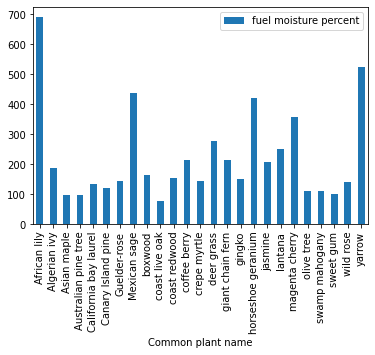

In [ ]:
ax= avg_old.plot.bar("Common plant name", y="fuel moisture percent", rot=90)

In [ ]:
avg_flower=flower_table.groupby('Common plant name', as_index=False)['fuel moisture percent'].mean()
avg_flower

,Common plant name,fuel moisture percent
0,Asian maple,97.105000
1,Australian pine tree,97.222500
2,Canary Island pine,120.916667
3,coast redwood,154.662500
4,crepe myrtle,119.620000
5,sweet gum,83.450000


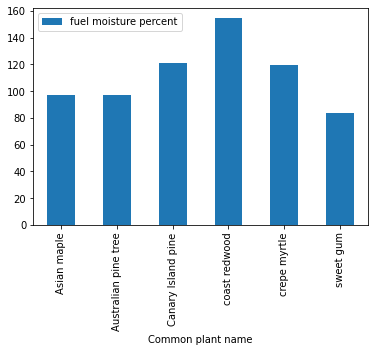

In [ ]:
ax= avg_flower.plot.bar("Common plant name", y="fuel moisture percent", rot=90)

In [ ]:
avg_disease=dead_disease_table.groupby('Common plant name', as_index=False)['fuel moisture percent'].mean()
avg_disease


,Common plant name,fuel moisture percent
0,deer grass,76.920000
1,gingko,103.310000
2,olive tree,101.680000
3,sweet gum,101.463333
4,yarrow,41.070000


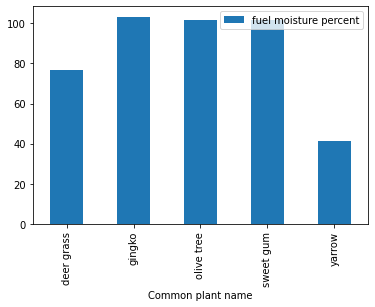

In [ ]:
ax= avg_disease.plot.bar("Common plant name", y="fuel moisture percent", rot=90)